<a href="https://colab.research.google.com/github/jupuerta/DialogForAlert/blob/master/FaceRecognitionBueno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga del dataset

In [18]:
!wget https://www.dropbox.com/s/chfwr4x475y3p1v/noticiasFotos.zip?dl=0 -O 2.zip
!unzip 2.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: 2/467124.jpg            
  inflating: 2/467130.jpg            
  inflating: 2/467131.jpg            
  inflating: 2/467132.jpg            
  inflating: 2/467135.jpg            
  inflating: 2/467136.jpg            
  inflating: 2/467138.jpg            
  inflating: 2/467139.jpg            
  inflating: 2/467140.jpg            
  inflating: 2/46715.jpg             
  inflating: 2/467156.jpg            
  inflating: 2/46716.jpg             
  inflating: 2/467161.jpg            
  inflating: 2/467163.jpg            
  inflating: 2/467164.jpg            
  inflating: 2/467169.jpg            
  inflating: 2/46717.jpg             
  inflating: 2/467170.jpg            
  inflating: 2/467173.jpg            
  inflating: 2/453565.jpg            
  inflating: 2/453569.jpg            
  inflating: 2/45357.jpg             
  inflating: 2/453572.jpg            
  inflating: 2/453576.jpg            
  inflating: 2/453577.jpg  

In [28]:
!wget https://www.dropbox.com/s/2t7n2q8b8gidjsh/foto.zip?dl=0 -O foto.zip
!unzip foto.zip

--2021-05-20 19:50:12--  https://www.dropbox.com/s/2t7n2q8b8gidjsh/foto.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2t7n2q8b8gidjsh/foto.zip [following]
--2021-05-20 19:50:12--  https://www.dropbox.com/s/raw/2t7n2q8b8gidjsh/foto.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd5bef26bd8d164d21a6f3a1b88.dl.dropboxusercontent.com/cd/0/inline/BO1j6XGJy701STh9XhI6rEXgBiUYKcrSvmyLN8UYBKVDQuQtO1ynX7YHYNNE1ABIV3OvW07UlX9glTRQFBH81RABJOoN4OAw4tMcKBZbFUE4BTBMyJcU_fvL8hqwdr_Q6pzmiC_cQHGPP_F-kowLK-Vu/file# [following]
--2021-05-20 19:50:13--  https://ucd5bef26bd8d164d21a6f3a1b88.dl.dropboxusercontent.com/cd/0/inline/BO1j6XGJy701STh9XhI6rEXgBiUYKcrSvmyLN8UYBKVDQuQtO1ynX7YHYNNE1ABIV3OvW07UlX9glTRQFBH81RABJOoN4OAw4

In [29]:
!wget https://www.dropbox.com/s/hljg44uz78f6nah/resultado.zip?dl=0 -O resultados.zip
!unzip resultados.zip

--2021-05-20 19:50:33--  https://www.dropbox.com/s/hljg44uz78f6nah/resultado.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hljg44uz78f6nah/resultado.zip [following]
--2021-05-20 19:50:33--  https://www.dropbox.com/s/raw/hljg44uz78f6nah/resultado.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc54e35473e05e7d8dc140ae1caf.dl.dropboxusercontent.com/cd/0/inline/BO31tBIDc28HQvbkwGWRurbYH-d_WIXiJOqPagFWaPCjU_W_R5XrYBU6wK1sPM4IHkmRcFgKYgz7L0uxBY1kB62_i899hZG3lODZcMKHyrr0zee7IuficbdL0QXhUApy8KpmnG_UsKSbljXkFSZWCeaY/file# [following]
--2021-05-20 19:50:33--  https://uc54e35473e05e7d8dc140ae1caf.dl.dropboxusercontent.com/cd/0/inline/BO31tBIDc28HQvbkwGWRurbYH-d_WIXiJOqPagFWaPCjU_W_R5XrYBU6wK1sPM4IHkmRcFgKYgz7L0uxBY

# Pruebas

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
!wget https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0 -O mobilenet_graph.pb
# Leer mobilenet_graph.pb
with tf.io.gfile.GFile('mobilenet_graph.pb','rb') as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Graph().as_default() as mobilenet:
    tf.import_graph_def(graph_def,name='')

--2021-05-20 19:36:41--  https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uji1ufb009ic3m0/mobilenet_graph.pb [following]
--2021-05-20 19:36:41--  https://www.dropbox.com/s/raw/uji1ufb009ic3m0/mobilenet_graph.pb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc78fd2cde184f91bda4d2bad0a1.dl.dropboxusercontent.com/cd/0/inline/BO2U1z06a4_7oKkNhTGSVCx7LsjI44U2xWnw38rU4JzPsV3z_3kT24vxQim3IZfK-CL6dflgasf6Cn4dvG-kYirITJj0BCB40c8foCmIwj9W4eCLBg-DnB0SCYQtyD2RDL04jvkdZKxlO_QlPsSfjWQY/file# [following]
--2021-05-20 19:36:42--  https://uc78fd2cde184f91bda4d2bad0a1.dl.dropboxusercontent.com/cd/0/inline/BO2U1z06a4_7oKkNhTGSVCx7LsjI44U2xWnw38rU4JzPsV3z_3kT24vxQim3IZfK-CL

In [8]:
print(mobilenet)

In [9]:
# Cargar imagen
def load_image(DIR, NAME):
    return cv2.cvtColor(cv2.imread(f'{DIR}/{name}'), cv2.COLOR_BGR2RGB)

In [10]:
def detect_faces(image, score_threshold=0.7):
    global boxes, scores
    (imh, imw) = image.shape[:-1]
    img = np.expand_dims(image,axis=0)
    
    # Inicializar mobilenet
    sess = tf.compat.v1.Session(graph=mobilenet)
    image_tensor = mobilenet.get_tensor_by_name('image_tensor:0')
    boxes = mobilenet.get_tensor_by_name('detection_boxes:0')
    scores = mobilenet.get_tensor_by_name('detection_scores:0')
    
    # Predicción (detección)
    (boxes, scores) = sess.run([boxes, scores], feed_dict={image_tensor:img})
    
    # Reajustar tamaños boxes, scores
    boxes = np.squeeze(boxes,axis=0)
    scores = np.squeeze(scores,axis=0)
    
    # Depurar bounding boxes
    idx = np.where(scores>=score_threshold)[0]
    
    # Crear bounding boxes
    bboxes = []
    for index in idx:
        ymin, xmin, ymax, xmax = boxes[index,:]
        (left, right, top, bottom) = (xmin*imw, xmax*imw, ymin*imh, ymax*imh)
        left, right, top, bottom = int(left), int(right), int(top), int(bottom)
        bboxes.append([left,right,top,bottom])
        
    return bboxes

In [11]:
# Dibujar bounding boxes
def draw_box(image,box,color,line_width=6):
    if box==[]:
        return image
    else:
        cv2.rectangle(image,(box[0],box[2]),(box[1],box[3]),color,line_width)
    return image

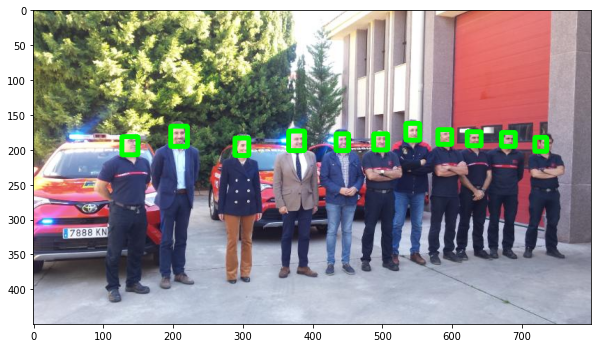

In [12]:
name = '777.jpg'
image = load_image('2',name)
bboxes = detect_faces(image)
for box in bboxes:
    detected_faces = draw_box(image,box,(0,255,0))
fig = plt.figure(figsize=(10,10))
plt.imshow(detected_faces)

In [13]:
# Extraer rostros
def extract_faces(image,bboxes,new_size=(160,160)):
    cropped_faces = []
    for box in bboxes:
        left, right, top, bottom = box
        face = image[top:bottom,left:right]
        cropped_faces.append(cv2.resize(face,dsize=new_size))
    return cropped_faces

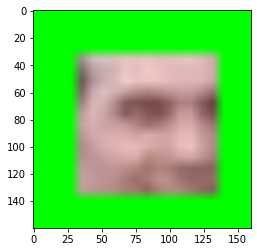

In [14]:
faces = extract_faces(image,bboxes)
plt.imshow(faces[1])

In [15]:
# FaceNet
!wget https://www.dropbox.com/s/z0o1of3580smtwr/facenet_keras.h5?dl=0 -O facenet_keras.h5


--2021-05-20 19:36:48--  https://www.dropbox.com/s/z0o1of3580smtwr/facenet_keras.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/z0o1of3580smtwr/facenet_keras.h5 [following]
--2021-05-20 19:36:49--  https://www.dropbox.com/s/raw/z0o1of3580smtwr/facenet_keras.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc724f09c16de6c7985acbdec819.dl.dropboxusercontent.com/cd/0/inline/BO0gpi7VDMBlZtgACCk8q2RnpBnqgaFNbu8Z6krKBi_u3ln4oAFQfxXcefJgXlV-obPwgzZETyS04l-fF94aRjBeLdd5YzjVcNSab0j7BMlmWcq6bGb0IhIgdMh1EGUD3zIsK-1FmrWTBn4PCLmciHW7/file# [following]
--2021-05-20 19:36:49--  https://uc724f09c16de6c7985acbdec819.dl.dropboxusercontent.com/cd/0/inline/BO0gpi7VDMBlZtgACCk8q2RnpBnqgaFNbu8Z6krKBi_u3ln4oAFQfxXcefJgXlV-obPwgzZE

In [16]:
facenet = load_model('facenet_keras.h5')

print(facenet.input_shape)
print(facenet.output_shape)

(None, 160, 160, 3)
(None, 128)


In [17]:
def compute_embedding(model,face):
    face = face.astype('float32')
    
    mean, std = face.mean(), face.std()
    face = (face-mean) / std
    
    face = np.expand_dims(face,axis=0)
    
    embedding = model.predict(face)
    return embedding

In [18]:
embedding = compute_embedding(facenet,faces[0])
print(embedding)

[[-5.82381934e-02 -1.19764686e+00  1.25598586e+00 -5.26612937e-01
  -2.20166907e-01 -4.10661191e-01  3.52265596e-01  7.58140087e-01
   6.79723799e-01 -1.51852882e+00  2.33484983e-01  5.75554743e-02
   2.27518654e+00  4.38606828e-01 -4.65667337e-01 -6.04926229e-01
  -1.79854333e-01  6.77351505e-02 -1.02673650e-01  5.66819049e-02
  -9.03088808e-01  8.01738977e-01 -1.69507933e+00  1.16097420e-01
   1.22030266e-04 -6.29971206e-01  3.65884095e-01  3.00557852e-01
  -8.46703112e-01  4.81536895e-01 -5.05037785e-01  6.28055573e-01
  -2.41421282e-01 -4.40057099e-01 -7.46894598e-01  1.33819151e+00
  -1.50288033e+00  3.95421863e-01 -1.06004906e+00  2.66634607e+00
   1.33339202e+00  2.90617913e-01  1.31665790e+00  4.82086301e-01
  -1.54306576e-01 -8.65637362e-01  7.94198692e-01 -1.83452129e-01
  -1.24661058e-01  3.11628431e-01 -1.84269404e+00  7.37763822e-01
  -1.73320770e-01 -1.45623744e-01 -7.57472217e-01  1.71476409e-01
  -9.73614812e-01 -7.92011797e-01  6.39628828e-01  8.22041929e-01
   9.11514

In [19]:
# Embeddings referencia
known_embeddings = []

print('Procesando rostros conocidos...')
for name in os.listdir('foto'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        image = load_image('foto',name)
        bboxes = detect_faces(image)
        face = extract_faces(image,bboxes)
        known_embeddings.append(compute_embedding(facenet,face[0]))        
        
        
        

Procesando rostros conocidos...
   conchaAndreu.jpg


In [20]:
print(known_embeddings)

[array([[ 0.16271378,  0.48621282,  1.8757733 , -0.8237932 ,  0.65940875,
        -0.3629448 ,  0.33533812,  0.7777411 , -0.45129365, -0.5489631 ,
        -0.06453061,  0.0870657 ,  1.7031118 ,  0.9023485 ,  0.16001502,
        -1.4287704 , -0.16216601, -0.4813192 ,  0.7864006 , -0.20852117,
        -0.905215  , -0.08942058, -0.47549418,  0.5858404 , -0.596419  ,
         0.2051493 , -0.8513644 ,  1.3090646 ,  0.48061842, -0.04805899,
        -0.776615  , -0.5880871 ,  0.75972813, -0.7453167 ,  0.01866461,
         0.5536673 , -0.24610794,  0.09339369, -0.9691724 ,  1.5265123 ,
         1.5485693 ,  1.0119599 ,  0.30268335,  0.30181786, -2.2646067 ,
         0.18283339, -0.99502933, -0.07626563,  0.24588485, -0.50420225,
         1.9102699 ,  2.2888114 ,  0.3953278 , -2.9916036 ,  0.11267579,
         1.0626606 ,  0.31108966,  0.3967505 ,  0.11094663, -0.6404616 ,
         0.9621406 , -1.744543  ,  0.7548506 ,  1.3502482 , -1.2542279 ,
        -0.4172296 , -0.09038731, -0.19936354,  2.

# Prueba con foto real

In [21]:
def compare_faces(embs_ref, emb_desc, umbral=11):
    distancias = []
    for emb_ref in embs_ref:
        distancias.append(np.linalg.norm(emb_ref-emb_desc))
    distancias = np.array(distancias)
    return distancias, list(distancias<=umbral)

In [23]:
# Reconocimiento (????) de rostros desconocidos
print('Procesando imágenes desconocidas...')
for name in os.listdir('resultados'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        try:
          image = load_image('resultados',name)
          bboxes = detect_faces(image)
          faces = extract_faces(image,bboxes)
          
          # Por cada rostro calcular embedding
          img_with_boxes = image.copy()
          for face, box in zip(faces,bboxes):
              emb = compute_embedding(facenet,face)
              
              _, reconocimiento = compare_faces(known_embeddings,emb)
              
              if any(reconocimiento):
                  print('     match!')
                  img_with_boxes = draw_box(img_with_boxes,box,(0,255,0))
                  result='result'
                  if(cont<10):
                    cv2.imwrite(f'{result}/{name}',cv2.cvtColor(img_with_boxes,cv2.COLOR_RGB2BGR))
                    cont=cont+1
              else:
                  img_with_boxes = draw_box(img_with_boxes,box,(255,0,0))
              resultados='resultados'
          ##cv2.imwrite(f'{resultados}/{name}',cv2.cvtColor(img_with_boxes,cv2.COLOR_RGB2BGR))
        except:
          print("An exception occurred")
print('¡Fin!')                    
            
        
        
        

Procesando imágenes desconocidas...
   15.jpg
   48.jpg
   25.jpg
   12.jpg
   47.jpg
   40.jpg
   31.jpg
     match!
   23.jpg
   0.jpg
   44.jpg
   10.jpg
   3.jpg
   35.jpg
   43.jpg
   18.jpg
   51.jpg
   46.jpg
   45.jpg
   22.jpg
   2.jpg
     match!
   29.jpg
   34.jpg
     match!
   28.jpg
   8.jpg
   32.jpg
   1.jpg
   16.jpg
   27.jpg
   38.jpg
   26.jpg
   6.jpg
   20.jpg
   36.jpg
   4.jpg
     match!
   21.jpg
   17.jpg
     match!
   9.jpg
   24.jpg
   5.jpg
   41.jpg
   49.jpg
   42.jpg
   11.jpg
     match!
   50.jpg
   13.jpg
   37.jpg
   14.jpg
     match!
   30.jpg
   7.jpg
     match!
   39.jpg
   33.jpg
   19.jpg
¡Fin!


# Almacenamiento de embedings

In [24]:
print('Procesando imágenes')
data=[["NombreFoto", "Embedding"]]
for name in os.listdir('resultados'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        try:
          image = load_image('resultados',name)
          bboxes = detect_faces(image)
          faces = extract_faces(image,bboxes)

          # Por cada rostro calcular embedding
          img_with_boxes = image.copy()
          cont=0
          for face, box in zip(faces,bboxes):
            lis=[]
            emb = compute_embedding(facenet,face)
            nameAux=name+" "+str(cont)
            lis.append(nameAux)
            lis.append(emb)
            data.append(lis)
            cont=cont+1

        except:
            print("An exception occurred")


Procesando imágenes
   15.jpg
   48.jpg
   25.jpg
   12.jpg
   47.jpg
   40.jpg
   31.jpg
   23.jpg
   0.jpg
   44.jpg
   10.jpg
   3.jpg
   35.jpg
   43.jpg
   18.jpg
   51.jpg
   46.jpg
   45.jpg
   22.jpg
   2.jpg
   29.jpg
   34.jpg
   28.jpg
   8.jpg
   32.jpg
   1.jpg
   16.jpg
   27.jpg
   38.jpg
   26.jpg
   6.jpg
   20.jpg
   36.jpg
   4.jpg
   21.jpg
   17.jpg
   9.jpg
   24.jpg
   5.jpg
   41.jpg
   49.jpg
   42.jpg
   11.jpg
   50.jpg
   13.jpg
   37.jpg
   14.jpg
   30.jpg
   7.jpg
   39.jpg
   33.jpg
   19.jpg


In [25]:
import csv
myFile = open('example.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(data)
     
print("Writing complete")

Writing complete


## Almacenamiento de Embeddings Completo

In [ ]:
print('Procesando imágenes')
data=[["NombreFoto", "Embedding"]]
for name in os.listdir('resultados'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        try:
          image = load_image('resultados',name)
          bboxes = detect_faces(image)
          faces = extract_faces(image,bboxes)

          # Por cada rostro calcular embedding
          cont=0
          for face, box in zip(faces,bboxes):
            lis=[]
            emb = compute_embedding(facenet,face)
            nameAux=str(os.listdir('3')[name])+" "+str(cont)
            lis.append(nameAux)
            lis.append(emb)
            data.append(lis)
            cont=cont+1

        except:
          print("An exception occurred")

import csv
myFile = open('example2.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(data)
     
print("Writing complete")